In [1]:
# import all necessary packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import missingno as msno
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import preprocessing
import seaborn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score
from statsmodels.formula.api import logit

In [2]:
# Pulling in the data [In text citation: Bowne-Anderson, H. (n.d)]
churned_data = pd.read_csv("C:/Users/cfman/OneDrive/Desktop/WGUClasses/D208 Regression Analysis/churn_clean_task2.csv")

In [3]:
# Before we get started into the actual cleaning, I want to check for duplicate values in case we need to edit those first
# I am also going to check the shape of the dataframe to verify the rows and columns
# [In text citation: Bowne-Anderson, H. (n.d)]
print(churned_data.shape)


duplicates = churned_data.duplicated(keep = False)
duplicates.value_counts()

(10000, 50)


False    10000
dtype: int64

In [4]:
# I want to check which have missing values here
# [In text citation: Bowne-Anderson, H. (n.d)]
churned_data.isna().sum()
#churned_data.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

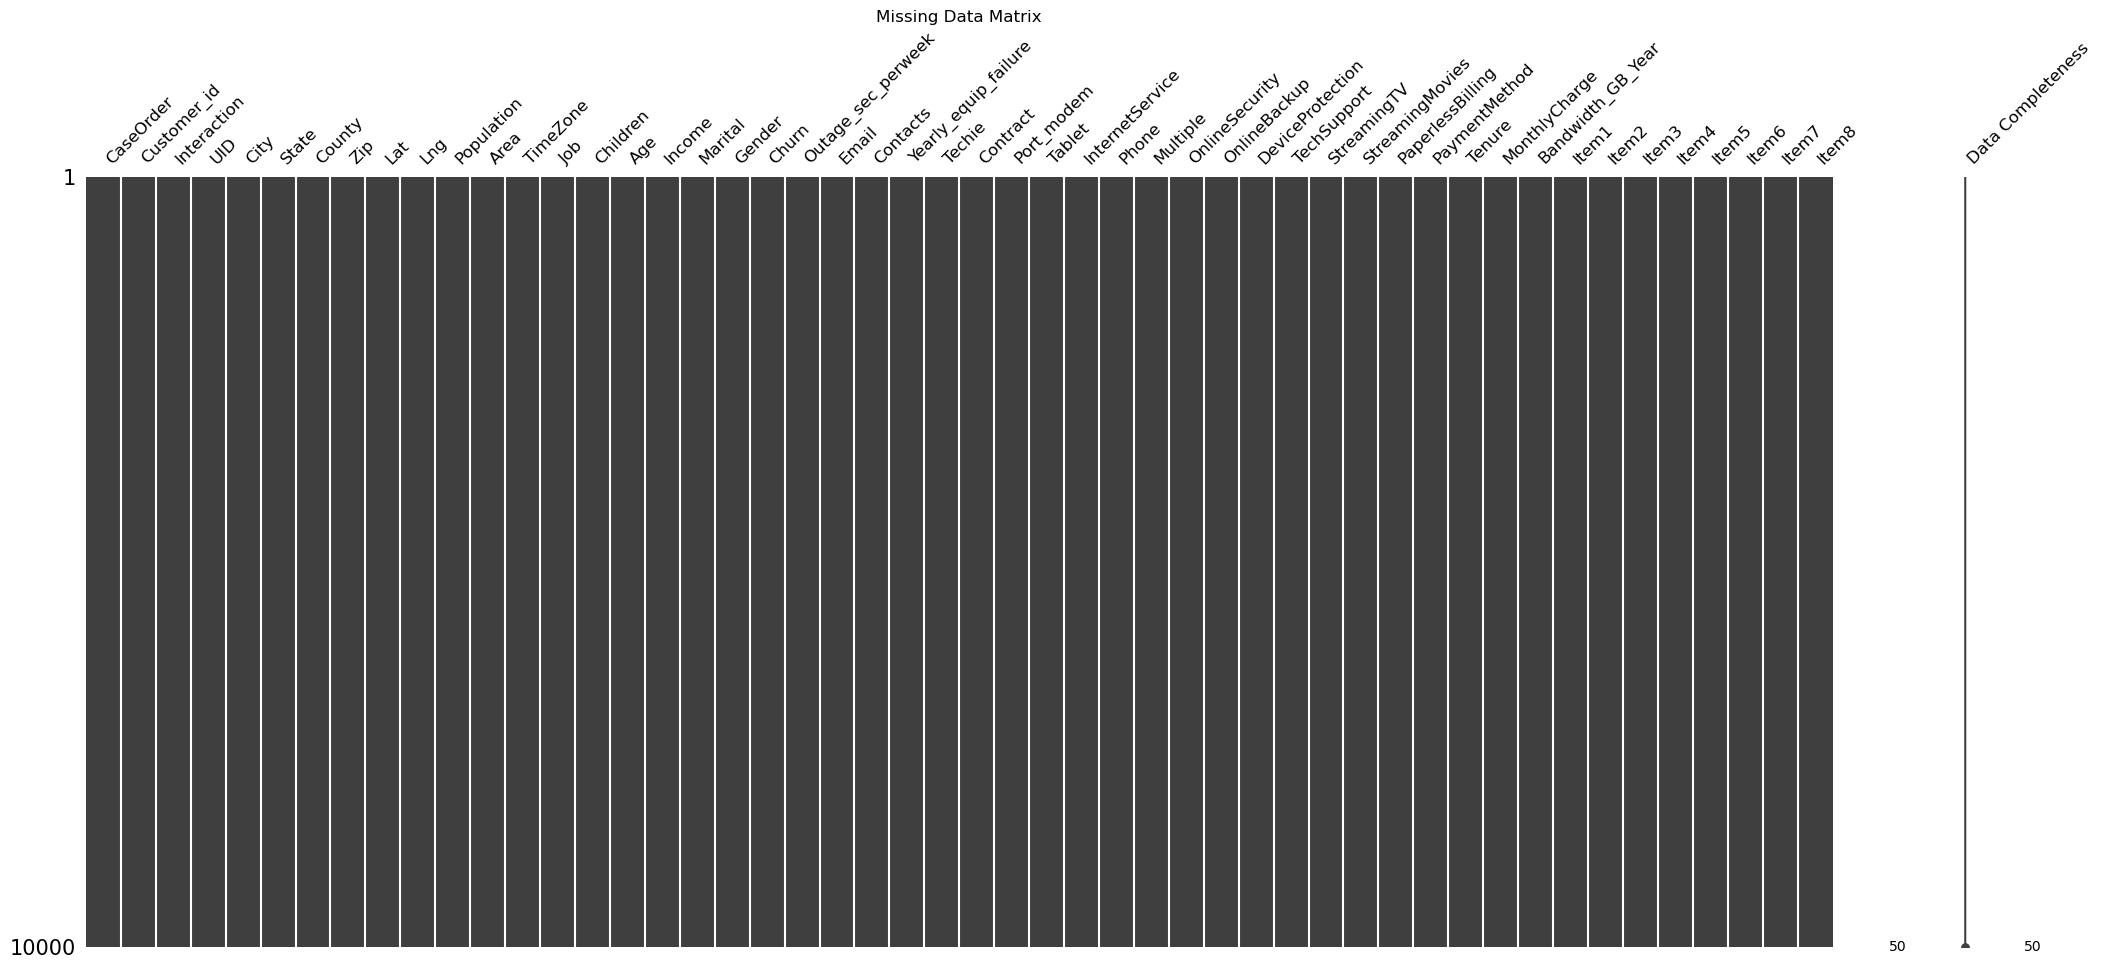

In [5]:
# Visualizing the missing data 
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Cleaning Essentials]
msno.matrix(churned_data, fontsize = 12, labels = True)
plt.title("Missing Data Matrix")
#plt.xlabel(col_names)
plt.show()

In [6]:
## Checking all the quantitative variables for outliers to decide if I need to edit them.

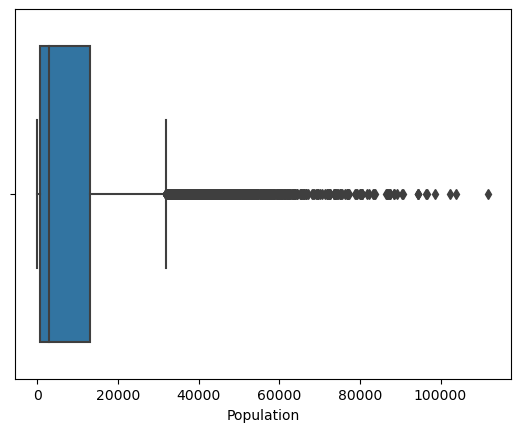

In [7]:
boxplot_population = seaborn.boxplot(x = "Population", data = churned_data)


In [8]:
## Choosing to retain outliers

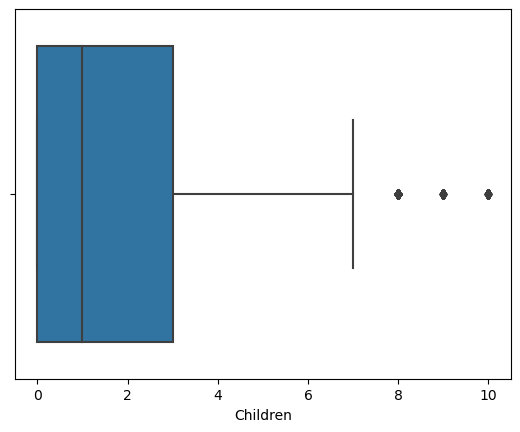

In [9]:
boxplot_Children = seaborn.boxplot(x = "Children", data = churned_data)

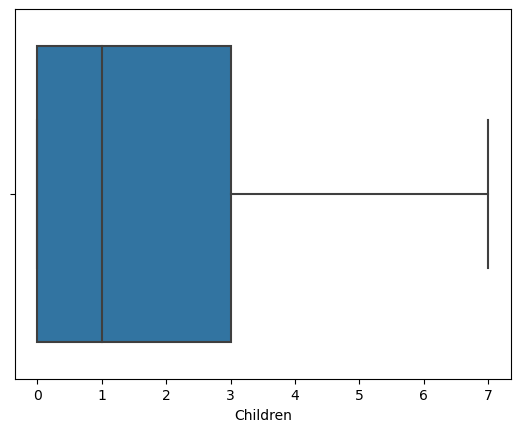

In [10]:
## Removing the  instances outlier and rechecking the plot
Children_outliers = churned_data[ (churned_data["Children"] > 7)]

churned_data.drop(churned_data[ (churned_data["Children"] > 7)].index, inplace = True )
Children_removed_outliers = seaborn.boxplot(x = "Children", data = churned_data)

In [11]:
## No more outliers detected for Children

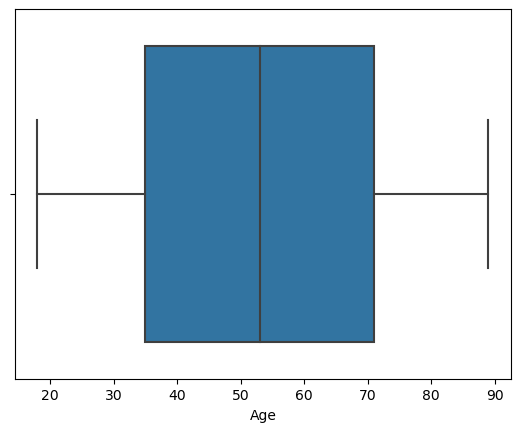

In [12]:
boxplot_Age = seaborn.boxplot(x = "Age", data = churned_data)

In [13]:
## No outliers detected for Age

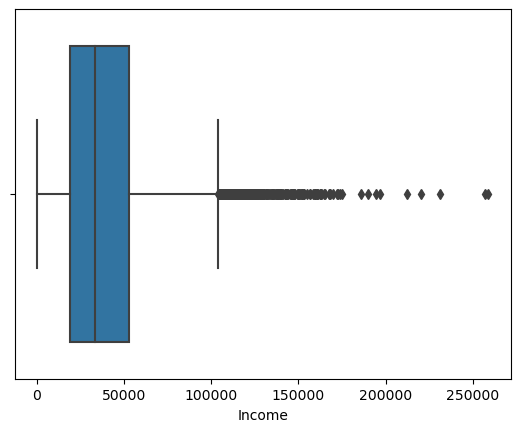

In [14]:
boxplot_Income = seaborn.boxplot(x = "Income", data = churned_data)

19268.980000000003 53141.83
33872.85
-31540.29499999999 103951.105


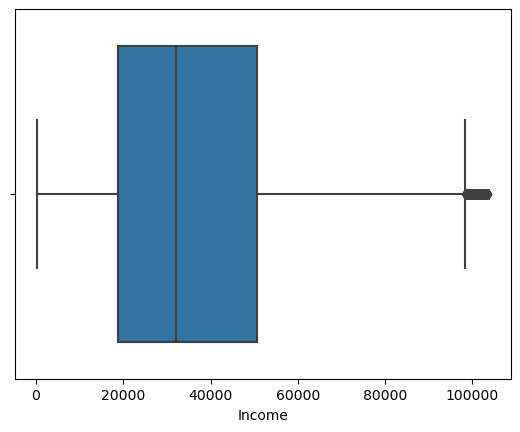

In [15]:
## Re-using my code that I created for D206, I will find the quartile ranges and then drop the necessary values. 

Income_q1, Income_q3 = np.percentile(churned_data["Income"], [25,75])
print(Income_q1, Income_q3)

Income_iqr = Income_q3 - Income_q1
print(Income_iqr)

Income_lower_limit = Income_q1 - (1.5*Income_iqr)
Income_upper_limit = Income_q3 + (1.5*Income_iqr)
print(Income_lower_limit, Income_upper_limit)

## Removing the  instances outlier and rechecking the plot
Income_outliers = churned_data[ (churned_data["Income"] > Income_upper_limit)]
#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Income"] > Income_upper_limit)].index, inplace = True )
Income_removed_outliers = seaborn.boxplot(x = "Income", data = churned_data)

In [16]:
## Going to RETAIN the outliers as there is depreciating returns on the continued reduction of the sample size

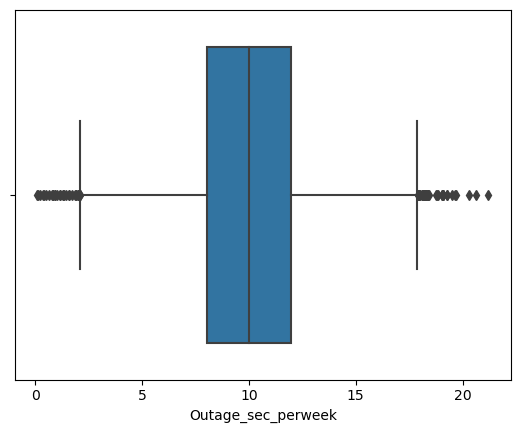

In [17]:
boxplot_Outage = seaborn.boxplot(x = "Outage_sec_perweek", data = churned_data)

8.024894 11.97165632
3.9467623199999995
2.1047505200000005 17.891799799999998


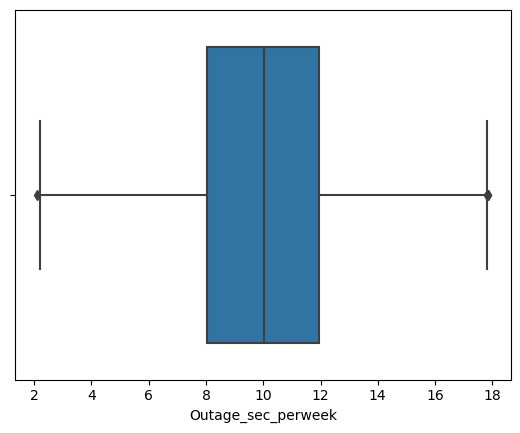

In [18]:
# Also want to check for the interquartile range to know where the value of potential outliers might lie
Outage_q1, Outage_q3 = np.percentile(churned_data["Outage_sec_perweek"], [25,75])
print(Outage_q1, Outage_q3)

Outage_iqr = Outage_q3 - Outage_q1
print(Outage_iqr)

Outage_lower_limit = Outage_q1 - (1.5*Outage_iqr)
Outage_upper_limit = Outage_q3 + (1.5*Outage_iqr)
print(Outage_lower_limit, Outage_upper_limit)

## Removing the values < 0
churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] < 0)].index, inplace = True )

## Removing the  instances outlier and rechecking the plot
Outage_sec_perweek_outliers = churned_data[ (churned_data["Outage_sec_perweek"] > Outage_upper_limit)]
Outage_sec_perweek_outliers.append(churned_data[(churned_data["Outage_sec_perweek"] < Outage_lower_limit)])
#Outage_sec_perweek_outliers.info()

churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] > Outage_upper_limit)].index, inplace = True )
churned_data.drop(churned_data[ (churned_data["Outage_sec_perweek"] < Outage_lower_limit)].index, inplace = True )

Outage_sec_perweek_removed_outliers = seaborn.boxplot(x = "Outage_sec_perweek", data = churned_data)

In [19]:
## Going to RETAIN the couple of straggling outliers since they are so close to the data

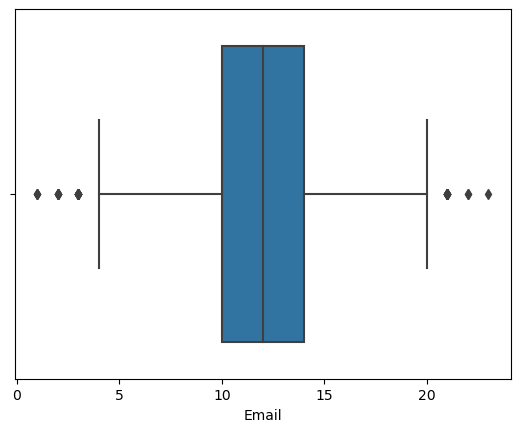

In [20]:
boxplot_Email = seaborn.boxplot(x = "Email", data = churned_data)

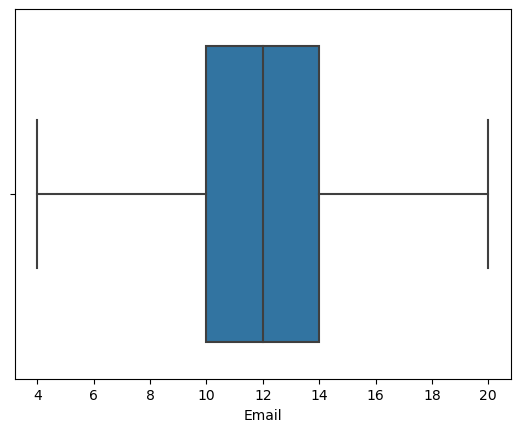

In [21]:
## Removing the  instances outlier and rechecking the plot
Email_outliers = churned_data[ (churned_data["Email"] > 20)]
Email_outliers.append(churned_data[(churned_data["Email"] < 4)])

#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Email"] > 20)].index, inplace = True )
churned_data.drop(churned_data[ (churned_data["Email"] < 4)].index, inplace = True )
Email_removed_outliers = seaborn.boxplot(x = "Email", data = churned_data)

In [22]:
## No more outliers detected for Email

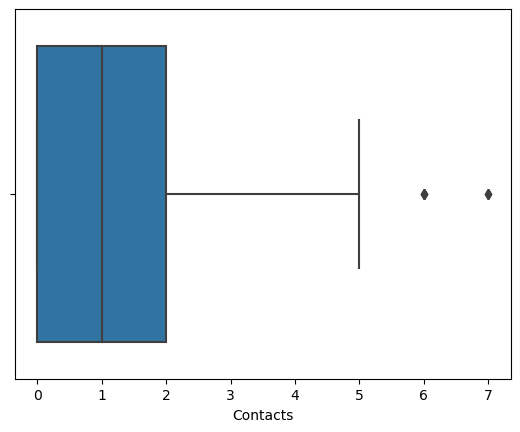

In [23]:
boxplot_Contacts = seaborn.boxplot(x = "Contacts", data = churned_data)

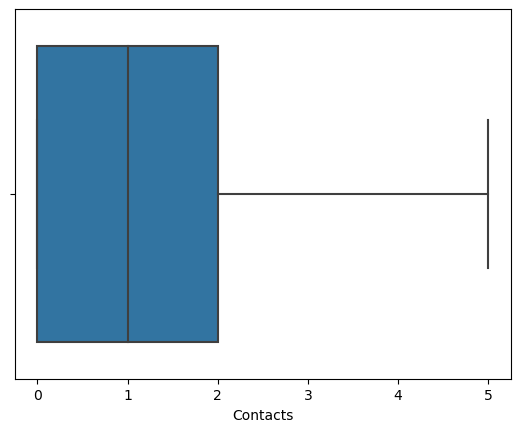

In [24]:
## Removing the  instances outlier and rechecking the plot
Contacts_outliers = churned_data[ (churned_data["Contacts"] > 5)]
#Income_outliers.info()

churned_data.drop(churned_data[ (churned_data["Contacts"] > 5)].index, inplace = True )
Contacts_removed_outliers = seaborn.boxplot(x = "Contacts", data = churned_data)

In [25]:
## No more outliers detected for Contacts

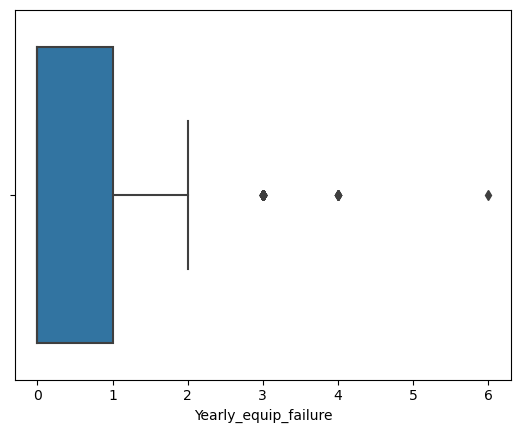

In [26]:
boxplot_Yearly_equip_failure = seaborn.boxplot(x = "Yearly_equip_failure", data = churned_data)

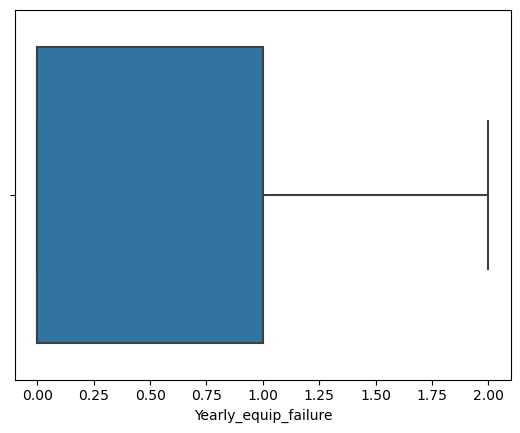

In [27]:
Yearly_equip_failure_outliers = churned_data[ (churned_data["Yearly_equip_failure"] > 2)]
#Yearly_equip_failure_outliers.info()

churned_data.drop(churned_data[ (churned_data["Yearly_equip_failure"] > 2)].index, inplace = True )
Yearly_equip_failure_removed_outliers = seaborn.boxplot(x = "Yearly_equip_failure", data = churned_data)

In [28]:
## No more outliers detected for Yearly_equip_failure

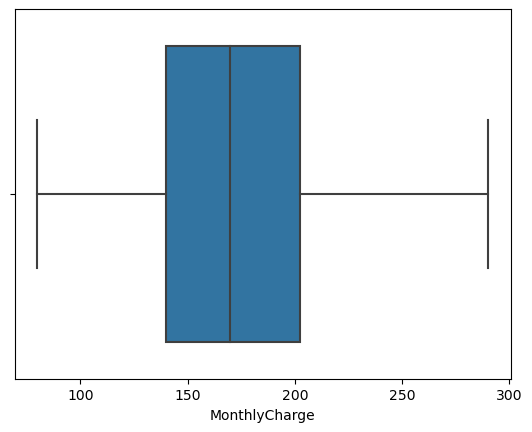

In [29]:
boxplot_MonthlyCharge = seaborn.boxplot(x = "MonthlyCharge", data = churned_data)

In [30]:
## No outliers detected for MonthlyCharge

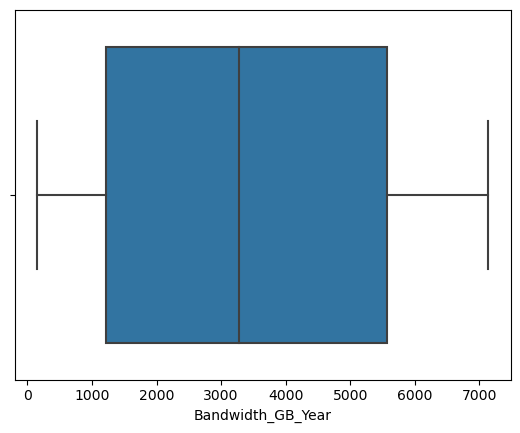

In [31]:
boxplot_Bandwidth_GB_Year = seaborn.boxplot(x = "Bandwidth_GB_Year", data = churned_data)

In [32]:
## No outliers detected for Bandwidth_GB_Year

In [33]:
churned_data.shape

(9079, 50)

In [34]:
## I'm going to create a new dataframe that has just the information and columns that i will use for my regression.
## I want to use all of the quantitative variables and some of the Yes/No response columns I found interesting. Since I used the other
## categorical variables in D207. I believe that will give 
## me 15 explanatory variables to use in the regression. Techie, Multiple, StreamingTV, TechSupport, OnlineSecurity are the categorical variables I will look at

churned_data_logistic = churned_data.drop(columns = ['CaseOrder', 'Customer_id','Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job',
                                                   'Marital', 'Gender', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone',
                                                   'OnlineBackup', 'DeviceProtection', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
                                                  'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [35]:
## Checking the new data set. 
## or to check on a specific customer without any data loss. Should have 18 columns now.
churned_data_logistic.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Multiple,OnlineSecurity,TechSupport,StreamingTV,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,No,7.978323,10,0,1,No,No,Yes,No,No,172.455519,904.536110
1,10446,1,27,21704.77,Yes,11.699080,12,0,1,Yes,Yes,Yes,No,Yes,242.632554,800.982766
2,3735,4,50,9609.57,No,10.752800,9,0,1,Yes,Yes,No,No,No,159.947583,2054.706961
3,13863,1,48,18925.23,No,14.913540,15,2,0,Yes,No,Yes,No,Yes,119.956840,2164.579412
4,11352,0,83,40074.19,Yes,8.147417,16,2,1,No,No,No,Yes,Yes,149.948316,271.493436


In [36]:
## Getting a list of all of the columns names except for the CaseOrder and Customer_id

column_headers = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Email', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'MonthlyCharge', 'StreamingTV', 'Churn', 'Bandwidth_GB_Year']
churned_cont =['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Email', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']
churned_cat = ['Churn','Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV',]
print("The Column Header :", column_headers)

The Column Header : ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Email', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'MonthlyCharge', 'StreamingTV', 'Churn', 'Bandwidth_GB_Year']


In [37]:
## Getting the summary statistics for each categorical variable

for i in range (0, len(churned_cat)):
    count, unique, top, freq = churned_data_logistic[churned_cat[i]].describe()
    print("Descriptive statistics for ", churned_cat[i], '\n', churned_data_logistic[churned_cat[i]].describe(), '\n')
    print("The overall proportion of responses is ", round((freq/count)*100, 2),"%", top, '\n')
    


Descriptive statistics for  Churn 
 count     9079
unique       2
top         No
freq      6666
Name: Churn, dtype: object 

The overall proportion of responses is  73.42 % No 

Descriptive statistics for  Techie 
 count     9079
unique       2
top         No
freq      7563
Name: Techie, dtype: object 

The overall proportion of responses is  83.3 % No 

Descriptive statistics for  Multiple 
 count     9079
unique       2
top         No
freq      4881
Name: Multiple, dtype: object 

The overall proportion of responses is  53.76 % No 

Descriptive statistics for  OnlineSecurity 
 count     9079
unique       2
top         No
freq      5830
Name: OnlineSecurity, dtype: object 

The overall proportion of responses is  64.21 % No 

Descriptive statistics for  TechSupport 
 count     9079
unique       2
top         No
freq      5694
Name: TechSupport, dtype: object 

The overall proportion of responses is  62.72 % No 

Descriptive statistics for  StreamingTV 
 count     9079
unique       2
t

In [38]:
## Getting the summary statistics for each continuous variable

for i in range (0, len(churned_cont)):
    print("Descriptive statistics for ", churned_cont[i], '\n', churned_data_logistic[churned_cont[i]].describe(), '\n')
    


Descriptive statistics for  Population 
 count      9079.000000
mean       9761.602269
std       14434.479659
min           0.000000
25%         745.000000
50%        2889.000000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64 

Descriptive statistics for  Children 
 count    9079.000000
mean        1.810992
std         1.695791
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         7.000000
Name: Children, dtype: float64 

Descriptive statistics for  Age 
 count    9079.000000
mean       53.210376
std        20.668749
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64 

Descriptive statistics for  Income 
 count      9079.000000
mean      36742.304085
std       22857.868877
min         348.670000
25%       18843.450000
50%       32125.500000
75%       50558.085000
max      103625.100000
Name: Income, dtype: float64 

Descriptive statis

Univariate plot for  Population 



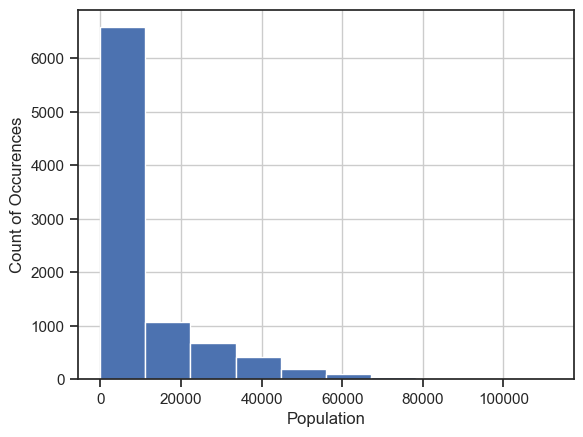

Univariate plot for  Children 



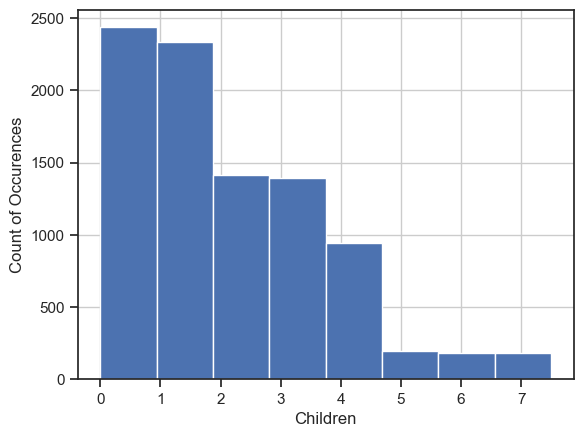

Univariate plot for  Age 



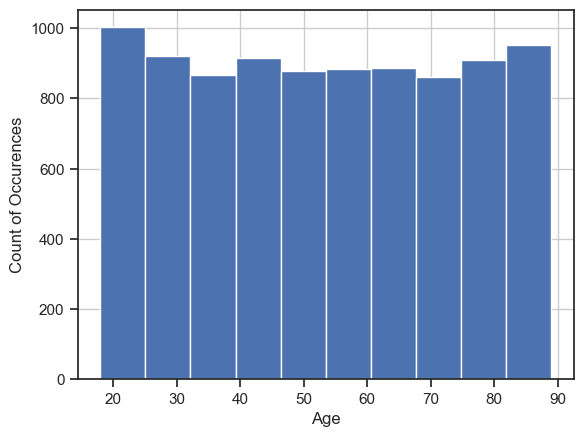

Univariate plot for  Income 



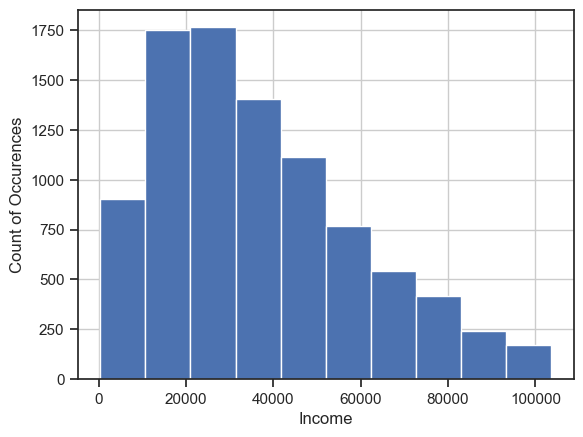

Univariate plot for  Outage_sec_perweek 



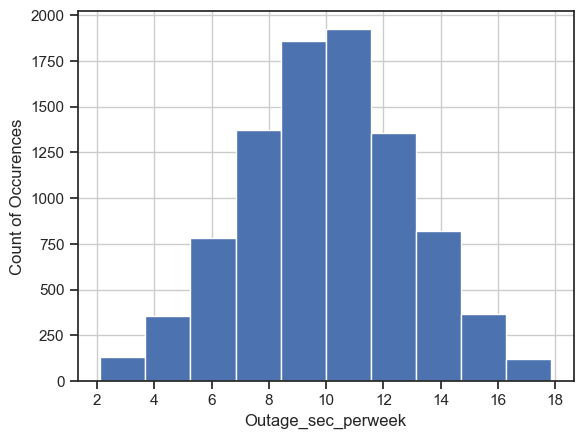

Univariate plot for  Contacts 



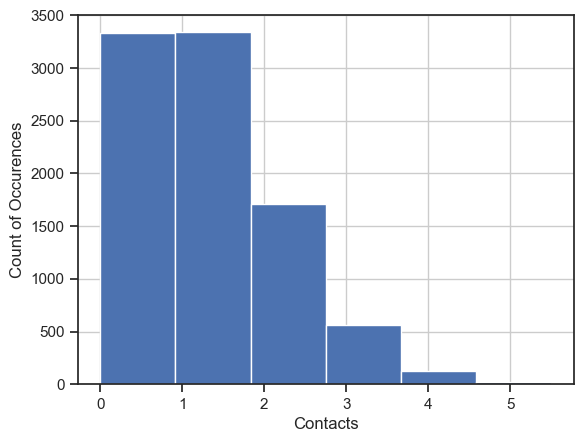

Univariate plot for  Email 



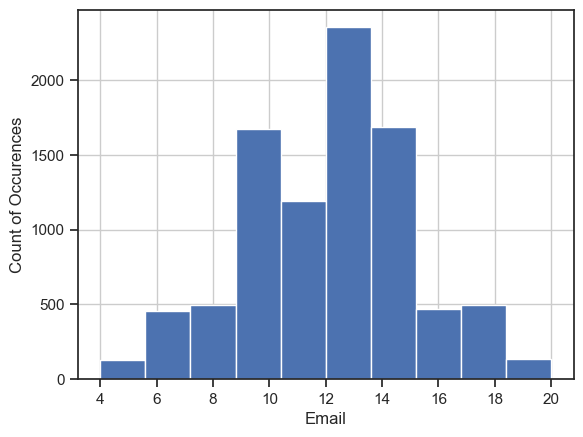

Univariate plot for  Yearly_equip_failure 



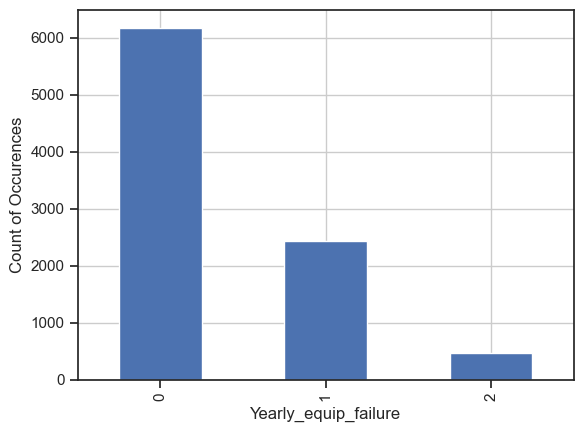

Univariate plot for  Techie 



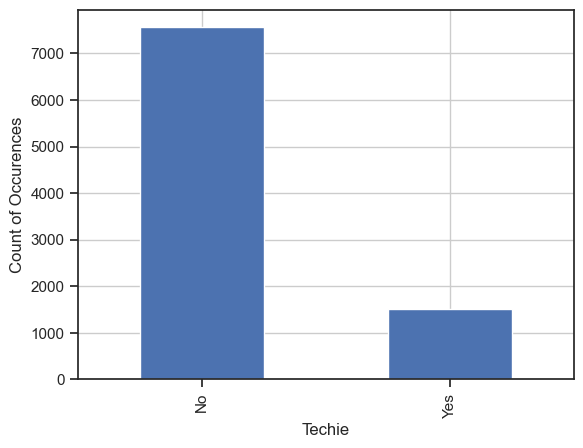

Univariate plot for  Multiple 



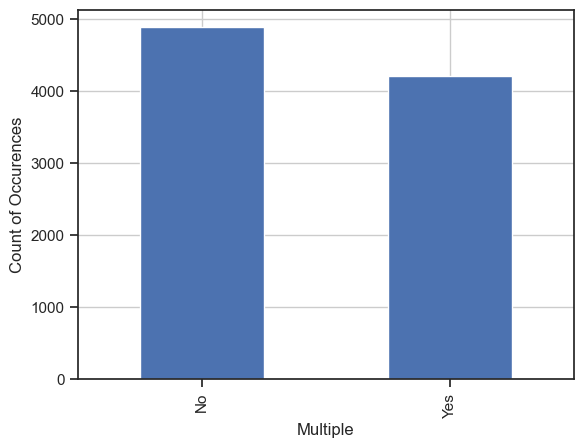

Univariate plot for  OnlineSecurity 



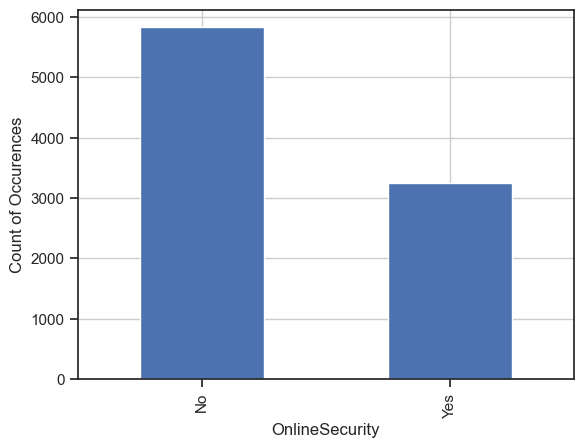

Univariate plot for  TechSupport 



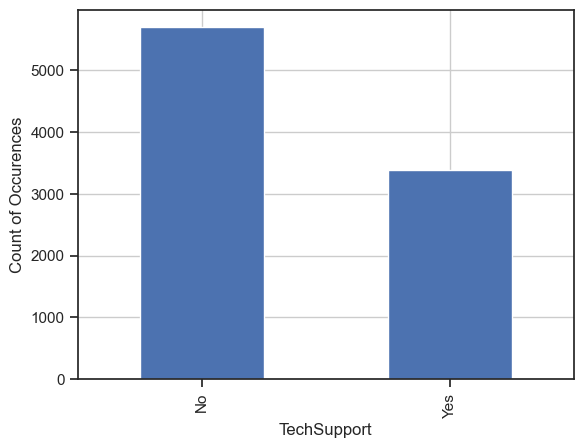

Univariate plot for  MonthlyCharge 



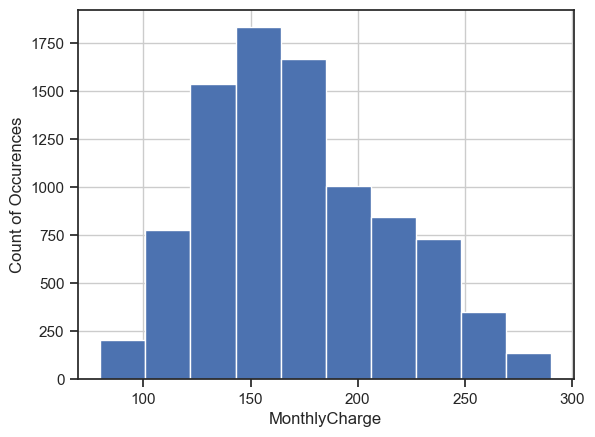

Univariate plot for  StreamingTV 



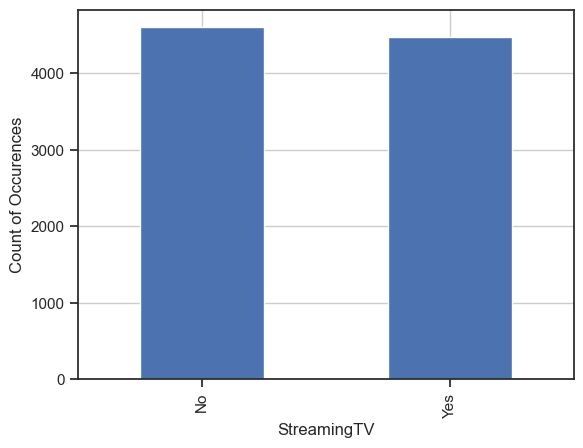

Univariate plot for  Churn 



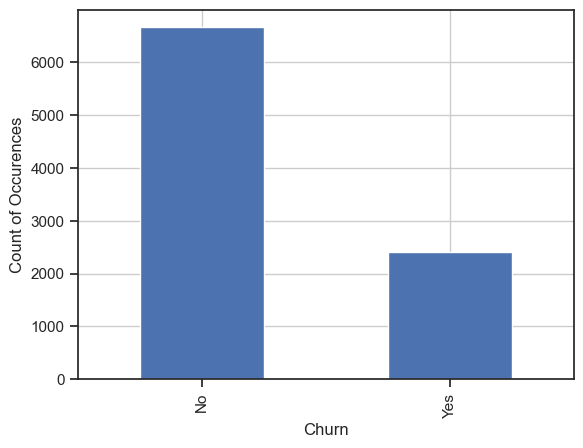

Univariate plot for  Bandwidth_GB_Year 



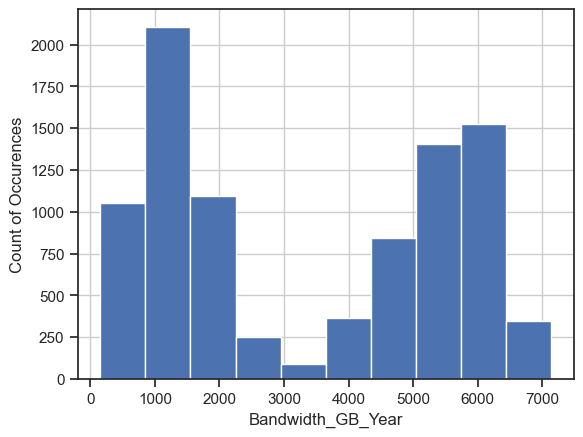

In [39]:
## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
seaborn.set_style("darkgrid")
seaborn.set(style="ticks")
for i in range(0, len(column_headers)):
    print("Univariate plot for ", column_headers[i], '\n')
    if churned_data_logistic[column_headers[i]].nunique() > 3 and churned_data_logistic[column_headers[i]].nunique() < 10:
        plt.hist(churned_data_logistic[column_headers[i]], 
                 bins = churned_data_logistic[column_headers[i]].nunique(), 
                 range = (churned_data_logistic[column_headers[i]].min(), (churned_data_logistic[column_headers[i]].max() + 0.5)))
        plt.xlabel(column_headers[i])
        plt.ylabel("Count of Occurences")
        plt.grid()
        plt.show()
    elif churned_data_logistic[column_headers[i]].nunique() < 4:
        churned_data_logistic[column_headers[i]].value_counts().plot(kind = 'bar')
        plt.xlabel(column_headers[i])
        plt.ylabel("Count of Occurences")
        plt.grid()
        plt.show()
    
    else:
        plt.hist(churned_data_logistic[column_headers[i]])
        plt.xlabel(column_headers[i])
        plt.ylabel("Count of Occurences")
        plt.grid()
        plt.show()

In [40]:
## Creating variables that are lists of each categorical and quantitative variable

churned_cont = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']
churned_cat = ['Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV']


Bivariate plot for Churn and Population


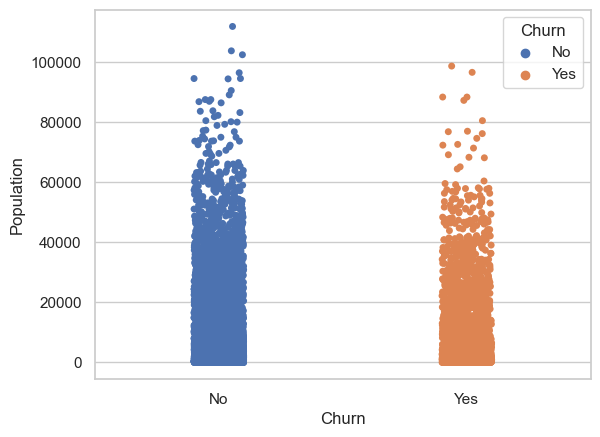

In [41]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Churn and Population")
seaborn.set(style = 'whitegrid')   
seaborn.stripplot(x = "Churn", y = "Population",  data = churned_data_logistic, hue = "Churn")
plt.show()


The count of Churn = Yes, Children =  0 is  646 

The count of Churn = No, Children =  0 is  1791 

The count of Churn = Yes, Children =  1 is  611 

The count of Churn = No, Children =  1 is  1725 

The count of Churn = Yes, Children =  2 is  371 

The count of Churn = No, Children =  2 is  1042 

The count of Churn = Yes, Children =  3 is  381 

The count of Churn = No, Children =  3 is  1011 

The count of Churn = Yes, Children =  4 is  262 

The count of Churn = No, Children =  4 is  682 

The count of Churn = Yes, Children =  5 is  59 

The count of Churn = No, Children =  5 is  137 

The count of Churn = Yes, Children =  6 is  35 

The count of Churn = No, Children =  6 is  144 

The count of Churn = Yes, Children =  7 is  48 

The count of Churn = No, Children =  7 is  134 



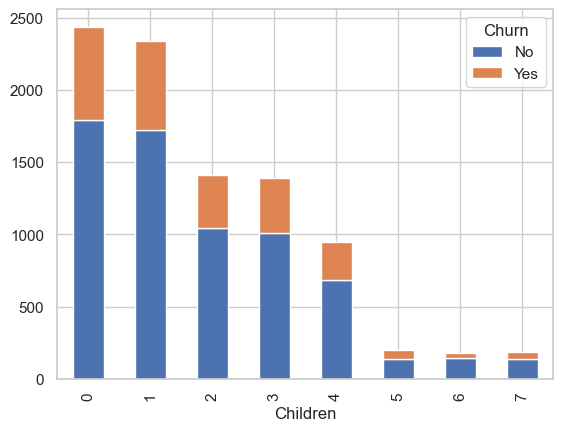

In [42]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_logistic[["Children", "Churn"]]

cat_plot = pd.crosstab(churned_data_logistic['Children'], churned_data_logistic['Churn']).plot(kind='bar', stacked=True)

for i in range(0,churned_data_logistic["Children"].nunique()):
    count_a = churned_data_test[(churned_data_test['Children'] == i) & (churned_data_test['Churn'] == 'Yes')].value_counts().tolist()[0]
    count_b = churned_data_test[(churned_data_test['Children'] == i) & (churned_data_test['Churn'] == 'No')].value_counts().tolist()[0]
    print('The count of Churn = Yes, Children = ', i, 'is ', count_a, '\n')
    print('The count of Churn = No, Children = ', i, 'is ', count_b, '\n')

Bivariate plot for Churn and Age


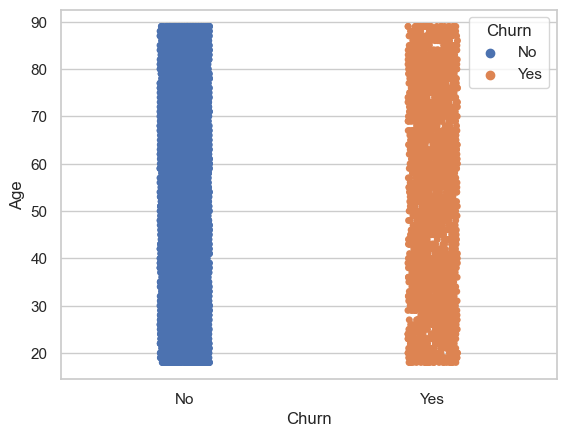

In [43]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Churn and Age")
seaborn.set(style = 'whitegrid')   
seaborn.stripplot(x = "Churn", y = "Age",  data = churned_data_logistic, hue = "Churn")
plt.show()


Bivariate plot for Churn and Income


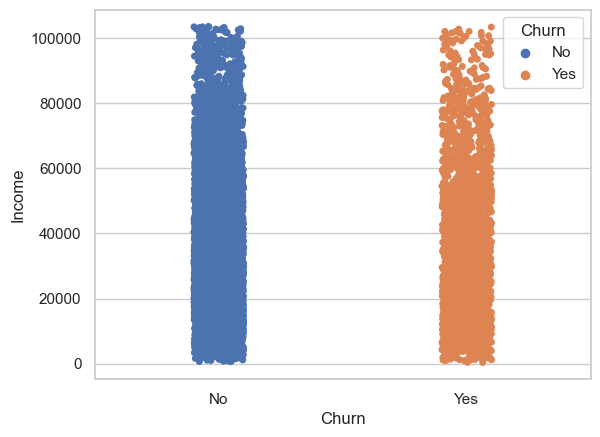

In [44]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Churn and Income")
seaborn.set(style = 'whitegrid')   
seaborn.stripplot(x = "Churn", y = "Income",  data = churned_data_logistic, hue = "Churn")
plt.show()


Bivariate plot for Churn and Outage_sec_perweek


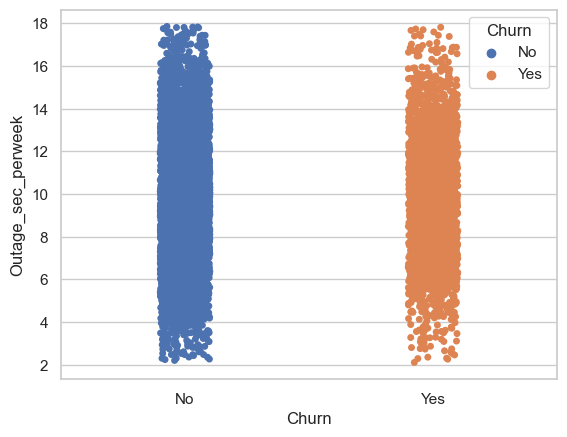

In [45]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Churn and Outage_sec_perweek")
seaborn.set(style = 'whitegrid')   
seaborn.stripplot(x = "Churn", y = "Outage_sec_perweek",  data = churned_data_logistic, hue = "Churn")
plt.show()


The count of Churn = Yes, Contacts =  0 is  858 

The count of Churn = No, Contacts =  0 is  2471 

The count of Churn = Yes, Contacts =  1 is  910 

The count of Churn = No, Contacts =  1 is  2430 

The count of Churn = Yes, Contacts =  2 is  460 

The count of Churn = No, Contacts =  2 is  1246 

The count of Churn = Yes, Contacts =  3 is  146 

The count of Churn = No, Contacts =  3 is  413 

The count of Churn = Yes, Contacts =  4 is  34 

The count of Churn = No, Contacts =  4 is  92 

The count of Churn = Yes, Contacts =  5 is  5 

The count of Churn = No, Contacts =  5 is  14 



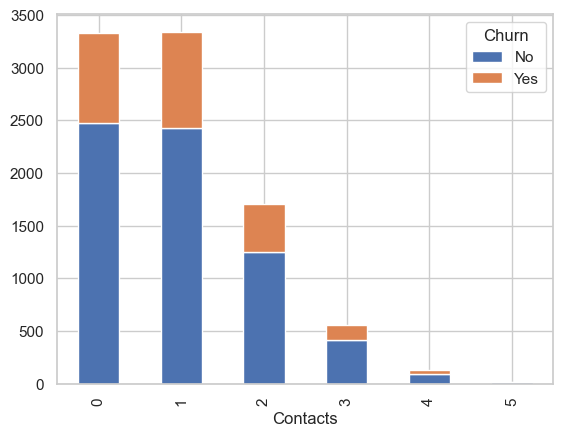

In [46]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_logistic[["Contacts", "Churn"]]

cat_plot = pd.crosstab(churned_data_logistic['Contacts'], churned_data_logistic['Churn']).plot(kind='bar', stacked=True)

for i in range(0,churned_data_logistic["Contacts"].nunique()):
    count_a = churned_data_test[(churned_data_test['Contacts'] == i) & (churned_data_test['Churn'] == 'Yes')].value_counts().tolist()[0]
    count_b = churned_data_test[(churned_data_test['Contacts'] == i) & (churned_data_test['Churn'] == 'No')].value_counts().tolist()[0]
    print('The count of Churn = Yes, Contacts = ', i, 'is ', count_a, '\n')
    print('The count of Churn = No, Contacts = ', i, 'is ', count_b, '\n')

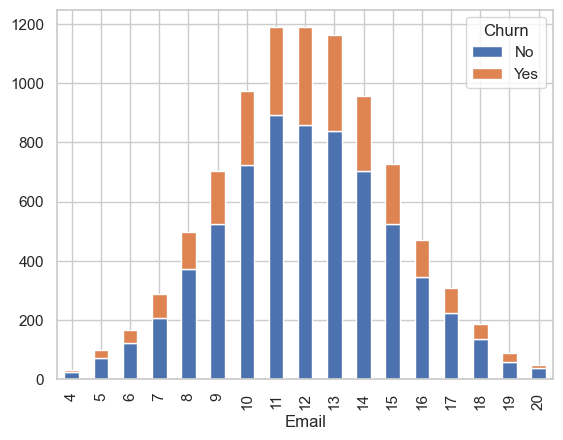

In [47]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_logistic[["Email", "Churn"]]

cat_plot = pd.crosstab(churned_data_logistic['Email'], churned_data_logistic['Churn']).plot(kind='bar', stacked=True)


The count of Churn = Yes, Yearly_equip_failure =  0 is  1650 

The count of Churn = No, Yearly_equip_failure =  0 is  4530 

The count of Churn = Yes, Yearly_equip_failure =  1 is  652 

The count of Churn = No, Yearly_equip_failure =  1 is  1780 

The count of Churn = Yes, Yearly_equip_failure =  2 is  111 

The count of Churn = No, Yearly_equip_failure =  2 is  356 



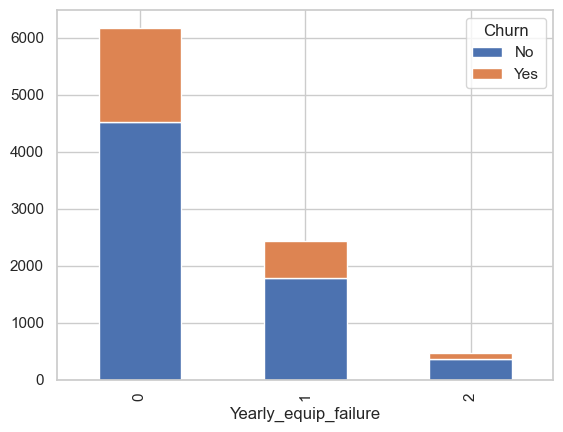

In [48]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_logistic[["Yearly_equip_failure", "Churn"]]

cat_plot = pd.crosstab(churned_data_logistic['Yearly_equip_failure'], churned_data_logistic['Churn']).plot(kind='bar', stacked=True)

for i in range(0,churned_data_logistic["Yearly_equip_failure"].nunique()):
    count_a = churned_data_test[(churned_data_test['Yearly_equip_failure'] == i) & (churned_data_test['Churn'] == 'Yes')].value_counts().tolist()[0]
    count_b = churned_data_test[(churned_data_test['Yearly_equip_failure'] == i) & (churned_data_test['Churn'] == 'No')].value_counts().tolist()[0]
    print('The count of Churn = Yes, Yearly_equip_failure = ', i, 'is ', count_a, '\n')
    print('The count of Churn = No, Yearly_equip_failure = ', i, 'is ', count_b, '\n')

The count of each combination of responses 

Techie  Churn
Yes     Yes      499
dtype: int64 

Techie  Churn
No      Yes      1914
dtype: int64 

Techie  Churn
Yes     No       1017
dtype: int64 

Techie  Churn
No      No       5649
dtype: int64 



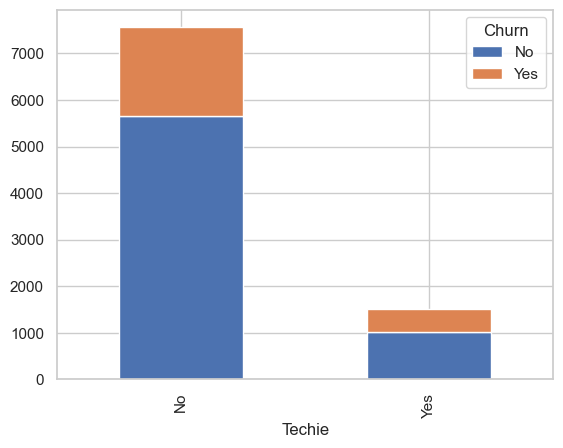

In [49]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_logistic[["Techie", "Churn"]]

cat_plot = pd.crosstab(churned_data_logistic['Techie'], churned_data_logistic['Churn']).plot(kind='bar', stacked=True)

for i in range(0,1):
    print('The count of each combination of responses', '\n')
    print(churned_data_test[(churned_data_test['Techie'] == 'Yes') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['Techie'] == 'No') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['Techie'] == 'Yes') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['Techie'] == 'No') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')

The count of each combination of responses 

Multiple  Churn
Yes       Yes      1382
dtype: int64 

Multiple  Churn
No        Yes      1031
dtype: int64 

Multiple  Churn
Yes       No       2816
dtype: int64 

Multiple  Churn
No        No       3850
dtype: int64 



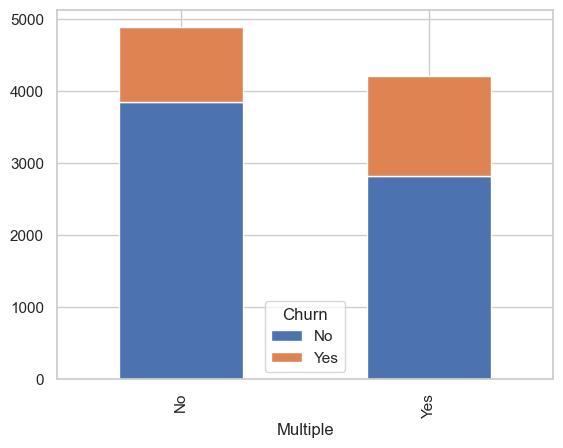

In [50]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_logistic[["Multiple", "Churn"]]

cat_plot = pd.crosstab(churned_data_logistic['Multiple'], churned_data_logistic['Churn']).plot(kind='bar', stacked=True)

for i in range(0,1):
    print('The count of each combination of responses', '\n')
    print(churned_data_test[(churned_data_test['Multiple'] == 'Yes') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['Multiple'] == 'No') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['Multiple'] == 'Yes') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['Multiple'] == 'No') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')

The count of each combination of responses 

OnlineSecurity  Churn
Yes             Yes      838
dtype: int64 

OnlineSecurity  Churn
No              Yes      1575
dtype: int64 

OnlineSecurity  Churn
Yes             No       2411
dtype: int64 

OnlineSecurity  Churn
No              No       4255
dtype: int64 



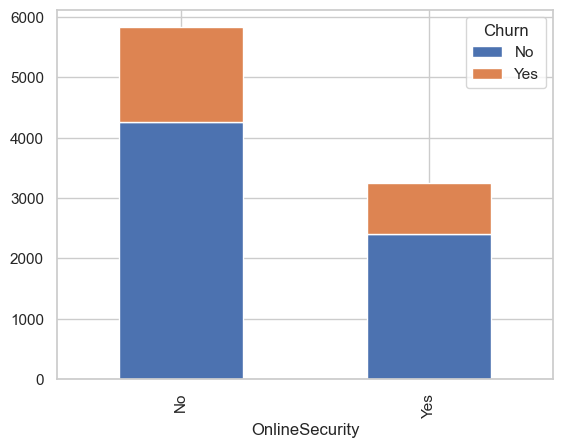

In [51]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_logistic[["OnlineSecurity", "Churn"]]

cat_plot = pd.crosstab(churned_data_logistic['OnlineSecurity'], churned_data_logistic['Churn']).plot(kind='bar', stacked=True)

for i in range(0,1):
    print('The count of each combination of responses', '\n')
    print(churned_data_test[(churned_data_test['OnlineSecurity'] == 'Yes') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['OnlineSecurity'] == 'No') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['OnlineSecurity'] == 'Yes') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['OnlineSecurity'] == 'No') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')

The count of each combination of responses 

TechSupport  Churn
Yes          Yes      933
dtype: int64 

TechSupport  Churn
No           Yes      1480
dtype: int64 

TechSupport  Churn
Yes          No       2452
dtype: int64 

TechSupport  Churn
No           No       4214
dtype: int64 



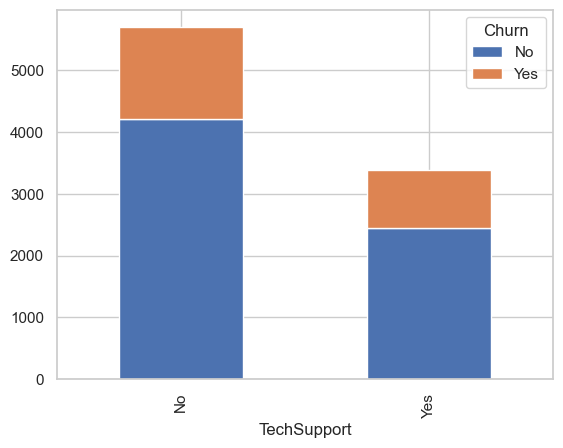

In [52]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_logistic[["TechSupport", "Churn"]]

cat_plot = pd.crosstab(churned_data_logistic['TechSupport'], churned_data_logistic['Churn']).plot(kind='bar', stacked=True)

for i in range(0,1):
    print('The count of each combination of responses', '\n')
    print(churned_data_test[(churned_data_test['TechSupport'] == 'Yes') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['TechSupport'] == 'No') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['TechSupport'] == 'Yes') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['TechSupport'] == 'No') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')

Bivariate plot for Churn and MonthlyCharge


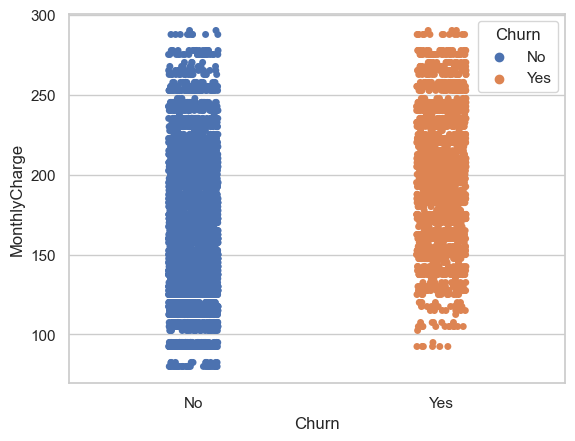

In [53]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Churn and MonthlyCharge")
seaborn.set(style = 'whitegrid')   
seaborn.stripplot(x = "Churn", y = "MonthlyCharge",  data = churned_data_logistic, hue = "Churn")
plt.show()


The count of each combination of responses 

StreamingTV  Churn
Yes          Yes      1656
dtype: int64 

StreamingTV  Churn
No           Yes      757
dtype: int64 

StreamingTV  Churn
Yes          No       2819
dtype: int64 

StreamingTV  Churn
No           No       3847
dtype: int64 



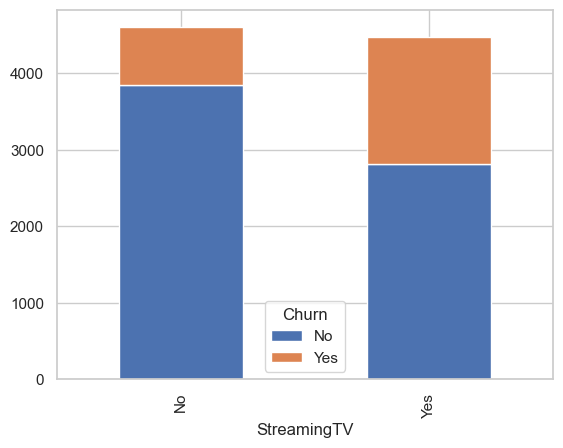

In [54]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
# In text citation: Stack Overflow. (n.d). Plotting categorical variables as stacked bar plot
## Plottig the stacked bar chart
churned_data_test = churned_data_logistic[["StreamingTV", "Churn"]]

cat_plot = pd.crosstab(churned_data_logistic['StreamingTV'], churned_data_logistic['Churn']).plot(kind='bar', stacked=True)

for i in range(0,1):
    print('The count of each combination of responses', '\n')
    print(churned_data_test[(churned_data_test['StreamingTV'] == 'Yes') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['StreamingTV'] == 'No') & (churned_data_test['Churn'] == 'Yes')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['StreamingTV'] == 'Yes') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')
    print(churned_data_test[(churned_data_test['StreamingTV'] == 'No') & (churned_data_test['Churn'] == 'No')].value_counts(), '\n')

Bivariate plot for Churn and Bandwidth_GB_Year


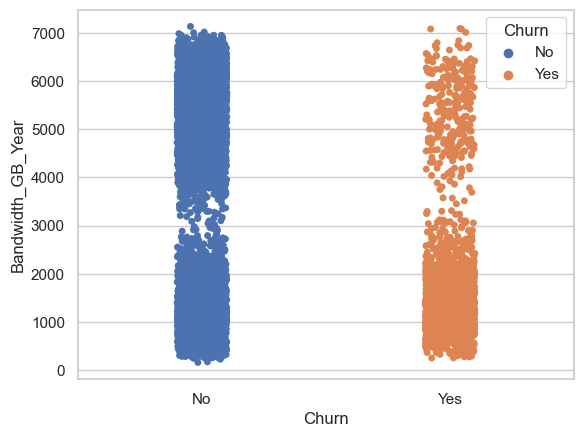

In [55]:
## Plotting the scatterplots for the categorical variables on the categorical variable Churn
## https://rkabacoff.github.io/datavis/Bivariate.html#categorical-vs.-quantitative
## https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html

print("Bivariate plot for Churn and Bandwidth_GB_Year")
seaborn.set(style = 'whitegrid')   
seaborn.stripplot(x = "Churn", y = "Bandwidth_GB_Year",  data = churned_data_logistic, hue = "Churn")
plt.show()


In [56]:
## Replacing all Yes/No responses with an int value corresponding to Yes = 1 and No = 0.
## Per my code from D206

churned_data_logistic = churned_data_logistic.replace({"Yes": 1, "No": 0})
#churned_data_logistic.head()

In [57]:
churned_data_logistic.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D208 Regression Analysis/churn_data_logistic.csv')
#print(churned_data_logistic.shape)

In [58]:
## From https://campus.datacamp.com/courses/intermediate-regression-with-statsmodels-in-python/multiple-logistic-regression-4?ex=3
## https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.predict.html#statsmodels.discrete.discrete_model.Logit.predict-parameters

explanatory = churned_data_logistic[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',  'Contacts', 'Email', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'MonthlyCharge', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_logistic['Churn']

explanatory_train,explanatory_test,target_train,target_test = train_test_split(explanatory,target,test_size=0.2,random_state=0) 

log_model = sm.Logit(target_train, explanatory_train)
res = log_model.fit()

prediction_data = explanatory_test.assign(Churn = res.predict(explanatory_test))
prediction_data["Most_Likely_Outcome"] = np.round(prediction_data["Churn"])

res_params = res.params.tolist()
res_exp = [math.exp(i) for i in res_params]
res_exp = [(i-1)*100 for i in res_exp]
res_exp = [round(i, 2) for i in res_exp]
print("Percentage change in the odd of Churn: ", '\n', res_exp)
print(res.summary2())
print("Accuracy:",metrics.accuracy_score(target_test, prediction_data["Most_Likely_Outcome"]))

Optimization terminated successfully.
         Current function value: 0.371737
         Iterations 7
Percentage change in the odd of Churn:  
 [-0.0, -2.81, -1.14, -0.0, -9.63, -4.02, -9.61, -11.22, 48.19, 11.89, -24.0, -22.39, 2.28, 126.22, -0.08]
                           Results: Logit
Model:                 Logit             Method:            MLE      
Dependent Variable:    Churn             Pseudo R-squared:  0.359    
Date:                  2024-09-16 16:39  AIC:               5429.8517
No. Observations:      7263              BIC:               5533.2100
Df Model:              14                Log-Likelihood:    -2699.9  
Df Residuals:          7248              LL-Null:           -4212.1  
Converged:             1.0000            LLR p-value:       0.0000   
No. Iterations:        7.0000            Scale:             1.0000   
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------

In [59]:
## Checking for the VIF scores to help check for multicollinearity issues
## Dr. Sewell’s video lecture “D208 Predictive Modeling Episode 1.” 


X = churned_data_logistic[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',  'Contacts', 'Email', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'MonthlyCharge', 'StreamingTV', 'Bandwidth_GB_Year']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature        VIF
0             Population   1.451280
1               Children   2.104860
2                    Age   6.845781
3                 Income   3.422229
4     Outage_sec_perweek  10.645264
5               Contacts   2.009096
6                  Email  12.655100
7   Yearly_equip_failure   1.399723
8                 Techie   1.196385
9               Multiple   2.299957
10        OnlineSecurity   1.555641
11           TechSupport   1.639128
12         MonthlyCharge  21.927360
13           StreamingTV   2.653613
14     Bandwidth_GB_Year   3.309875


In [60]:
## Checking for the VIF scores to help check for multicollinearity issues. Removing MonthlyCharge and re-checking
## Dr. Sewell’s video lecture “D208 Predictive Modeling Episode 1.” 


X = churned_data_logistic[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',  'Contacts', 'Email', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature        VIF
0             Population   1.448038
1               Children   2.089207
2                    Age   6.556533
3                 Income   3.376816
4     Outage_sec_perweek   9.800218
5               Contacts   1.998031
6                  Email  11.249117
7   Yearly_equip_failure   1.396944
8                 Techie   1.193568
9               Multiple   1.826244
10        OnlineSecurity   1.536267
11           TechSupport   1.582699
12           StreamingTV   1.948498
13     Bandwidth_GB_Year   3.239337


In [61]:
## Checking for the VIF scores to help check for multicollinearity issues. Removing Email and re-checking
## Dr. Sewell’s video lecture “D208 Predictive Modeling Episode 1.” 


X = churned_data_logistic[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',  'Contacts','Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature       VIF
0             Population  1.438097
1               Children  2.064966
2                    Age  5.937597
3                 Income  3.271222
4     Outage_sec_perweek  8.037831
5               Contacts  1.975989
6   Yearly_equip_failure  1.392484
7                 Techie  1.192060
8               Multiple  1.808933
9         OnlineSecurity  1.530118
10           TechSupport  1.566204
11           StreamingTV  1.930320
12     Bandwidth_GB_Year  3.166402


In [62]:
## From https://campus.datacamp.com/courses/intermediate-regression-with-statsmodels-in-python/multiple-logistic-regression-4?ex=3
## https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.predict.html#statsmodels.discrete.discrete_model.Logit.predict-parameters

explanatory = churned_data_logistic[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_logistic['Churn']

explanatory_train,explanatory_test,target_train,target_test = train_test_split(explanatory,target,test_size=0.2,random_state=0) 

log_model = sm.Logit(target_train, explanatory_train)
res = log_model.fit()

prediction_data = explanatory_test.assign(Churn = res.predict(explanatory_test))
prediction_data["Most_Likely_Outcome"] = np.round(prediction_data["Churn"])


print(res.params)
print(res.summary2())
print("Accuracy:",metrics.accuracy_score(target_test, prediction_data["Most_Likely_Outcome"]))

Optimization terminated successfully.
         Current function value: 0.415016
         Iterations 7
Population             -1.672446e-06
Children                1.570966e-02
Age                    -4.143524e-03
Income                 -5.231948e-07
Outage_sec_perweek     -2.920405e-02
Yearly_equip_failure   -6.407452e-02
Techie                  4.270961e-01
Multiple                8.406262e-01
OnlineSecurity         -6.769316e-02
TechSupport             5.218983e-02
StreamingTV             1.627021e+00
Bandwidth_GB_Year      -6.752224e-04
dtype: float64
                           Results: Logit
Model:                 Logit             Method:            MLE      
Dependent Variable:    Churn             Pseudo R-squared:  0.284    
Date:                  2024-09-16 16:39  AIC:               6052.5270
No. Observations:      7263              BIC:               6135.2135
Df Model:              11                Log-Likelihood:    -3014.3  
Df Residuals:          7251              LL-Nul

In [63]:
## From https://campus.datacamp.com/courses/intermediate-regression-with-statsmodels-in-python/multiple-logistic-regression-4?ex=3
## https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.predict.html#statsmodels.discrete.discrete_model.Logit.predict-parameters
## Backwards Stepwise Elim. Removing Income, then re-checking.

explanatory = churned_data_logistic[['Population', 'Children', 'Age', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_logistic['Churn']

explanatory_train,explanatory_test,target_train,target_test = train_test_split(explanatory,target,test_size=0.2,random_state=0) 

log_model = sm.Logit(target_train, explanatory_train)
res = log_model.fit()

prediction_data = explanatory_test.assign(Churn = res.predict(explanatory_test))
prediction_data["Most_Likely_Outcome"] = np.round(prediction_data["Churn"])


print(res.params)
print(res.summary2())
print("Accuracy:",metrics.accuracy_score(target_test, prediction_data["Most_Likely_Outcome"]))

Optimization terminated successfully.
         Current function value: 0.415027
         Iterations 7
Population             -0.000002
Children                0.015036
Age                    -0.004232
Outage_sec_perweek     -0.030115
Yearly_equip_failure   -0.064845
Techie                  0.426039
Multiple                0.839622
OnlineSecurity         -0.068335
TechSupport             0.050504
StreamingTV             1.625884
Bandwidth_GB_Year      -0.000676
dtype: float64
                           Results: Logit
Model:                 Logit             Method:            MLE      
Dependent Variable:    Churn             Pseudo R-squared:  0.284    
Date:                  2024-09-16 16:39  AIC:               6050.6798
No. Observations:      7263              BIC:               6126.4758
Df Model:              10                Log-Likelihood:    -3014.3  
Df Residuals:          7252              LL-Null:           -4212.1  
Converged:             1.0000            LLR p-value:     

In [64]:
## From https://campus.datacamp.com/courses/intermediate-regression-with-statsmodels-in-python/multiple-logistic-regression-4?ex=3
## https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.predict.html#statsmodels.discrete.discrete_model.Logit.predict-parameters
## Backwards Stepwise Elim. Removing Population, then re-checking.

explanatory = churned_data_logistic[['Children', 'Age', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_logistic['Churn']

explanatory_train,explanatory_test,target_train,target_test = train_test_split(explanatory,target,test_size=0.2,random_state=0) 

log_model = sm.Logit(target_train, explanatory_train)
res = log_model.fit()

prediction_data = explanatory_test.assign(Churn = res.predict(explanatory_test))
prediction_data["Most_Likely_Outcome"] = np.round(prediction_data["Churn"])


print(res.params)
print(res.summary2())
print("Accuracy:",metrics.accuracy_score(target_test, prediction_data["Most_Likely_Outcome"]))

Optimization terminated successfully.
         Current function value: 0.415068
         Iterations 7
Children                0.014756
Age                    -0.004344
Outage_sec_perweek     -0.030917
Yearly_equip_failure   -0.064870
Techie                  0.425141
Multiple                0.838670
OnlineSecurity         -0.069866
TechSupport             0.050669
StreamingTV             1.625312
Bandwidth_GB_Year      -0.000676
dtype: float64
                           Results: Logit
Model:                 Logit             Method:            MLE      
Dependent Variable:    Churn             Pseudo R-squared:  0.284    
Date:                  2024-09-16 16:39  AIC:               6049.2729
No. Observations:      7263              BIC:               6118.1784
Df Model:              9                 Log-Likelihood:    -3014.6  
Df Residuals:          7253              LL-Null:           -4212.1  
Converged:             1.0000            LLR p-value:       0.0000   
No. Iterations:      

In [65]:
## From https://campus.datacamp.com/courses/intermediate-regression-with-statsmodels-in-python/multiple-logistic-regression-4?ex=3
## https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.predict.html#statsmodels.discrete.discrete_model.Logit.predict-parameters
## Backwards Stepwise Elim. Removing TechSupport, then re-checking.


explanatory = churned_data_logistic[['Children', 'Age', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_logistic['Churn']

explanatory_train,explanatory_test,target_train,target_test = train_test_split(explanatory,target,test_size=0.2,random_state=0) 

log_model = sm.Logit(target_train, explanatory_train)
res = log_model.fit()

prediction_data = explanatory_test.assign(Churn = res.predict(explanatory_test))
prediction_data["Most_Likely_Outcome"] = np.round(prediction_data["Churn"])


print(res.params)
print(res.summary2())
print("Accuracy:",metrics.accuracy_score(target_test, prediction_data["Most_Likely_Outcome"]))

Optimization terminated successfully.
         Current function value: 0.415109
         Iterations 7
Children                0.015043
Age                    -0.004228
Outage_sec_perweek     -0.030178
Yearly_equip_failure   -0.063769
Techie                  0.426572
Multiple                0.840614
OnlineSecurity         -0.066874
StreamingTV             1.625707
Bandwidth_GB_Year      -0.000675
dtype: float64
                           Results: Logit
Model:                 Logit             Method:            MLE      
Dependent Variable:    Churn             Pseudo R-squared:  0.284    
Date:                  2024-09-16 16:39  AIC:               6047.8689
No. Observations:      7263              BIC:               6109.8838
Df Model:              8                 Log-Likelihood:    -3014.9  
Df Residuals:          7254              LL-Null:           -4212.1  
Converged:             1.0000            LLR p-value:       0.0000   
No. Iterations:        7.0000            Scale:       

In [66]:
## From https://campus.datacamp.com/courses/intermediate-regression-with-statsmodels-in-python/multiple-logistic-regression-4?ex=3
## https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.predict.html#statsmodels.discrete.discrete_model.Logit.predict-parameters
## Backwards Stepwise Elim. Removing Children, then re-checking.

explanatory = churned_data_logistic[['Age', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Techie', 'Multiple', 'OnlineSecurity', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_logistic['Churn']

explanatory_train,explanatory_test,target_train,target_test = train_test_split(explanatory,target,test_size=0.2,random_state=0) 

log_model = sm.Logit(target_train, explanatory_train)
res = log_model.fit()

prediction_data = explanatory_test.assign(Churn = res.predict(explanatory_test))
prediction_data["Most_Likely_Outcome"] = np.round(prediction_data["Churn"])


print(res.params)
print(res.summary2())
print("Accuracy:",metrics.accuracy_score(target_test, prediction_data["Most_Likely_Outcome"]))

Optimization terminated successfully.
         Current function value: 0.415154
         Iterations 7
Age                    -0.004090
Outage_sec_perweek     -0.028801
Yearly_equip_failure   -0.062425
Techie                  0.426278
Multiple                0.842329
OnlineSecurity         -0.065745
StreamingTV             1.628120
Bandwidth_GB_Year      -0.000674
dtype: float64
                           Results: Logit
Model:                 Logit             Method:            MLE      
Dependent Variable:    Churn             Pseudo R-squared:  0.284    
Date:                  2024-09-16 16:39  AIC:               6046.5282
No. Observations:      7263              BIC:               6101.6526
Df Model:              7                 Log-Likelihood:    -3015.3  
Df Residuals:          7255              LL-Null:           -4212.1  
Converged:             1.0000            LLR p-value:       0.0000   
No. Iterations:        7.0000            Scale:             1.0000   
-----------------

In [67]:
## From https://campus.datacamp.com/courses/intermediate-regression-with-statsmodels-in-python/multiple-logistic-regression-4?ex=3
## https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.predict.html#statsmodels.discrete.discrete_model.Logit.predict-parameters
## Backwards Stepwise Elim. Removing OnlineSecurity, then re-checking.

explanatory = churned_data_logistic[['Age', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Techie', 'Multiple', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_logistic['Churn']

explanatory_train,explanatory_test,target_train,target_test = train_test_split(explanatory,target,test_size=0.2,random_state=0) 

log_model = sm.Logit(target_train, explanatory_train)
res = log_model.fit()

prediction_data = explanatory_test.assign(Churn = res.predict(explanatory_test))
prediction_data["Most_Likely_Outcome"] = np.round(prediction_data["Churn"])


print(res.params)
print(res.summary2())
print("Accuracy:",metrics.accuracy_score(target_test, prediction_data["Most_Likely_Outcome"]))

Optimization terminated successfully.
         Current function value: 0.415223
         Iterations 7
Age                    -0.004206
Outage_sec_perweek     -0.030020
Yearly_equip_failure   -0.063438
Techie                  0.426107
Multiple                0.840059
StreamingTV             1.625859
Bandwidth_GB_Year      -0.000675
dtype: float64
                           Results: Logit
Model:                 Logit             Method:            MLE      
Dependent Variable:    Churn             Pseudo R-squared:  0.284    
Date:                  2024-09-16 16:39  AIC:               6045.5241
No. Observations:      7263              BIC:               6093.7579
Df Model:              6                 Log-Likelihood:    -3015.8  
Df Residuals:          7256              LL-Null:           -4212.1  
Converged:             1.0000            LLR p-value:       0.0000   
No. Iterations:        7.0000            Scale:             1.0000   
--------------------------------------------------

In [68]:
## From https://campus.datacamp.com/courses/intermediate-regression-with-statsmodels-in-python/multiple-logistic-regression-4?ex=3
## https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.predict.html#statsmodels.discrete.discrete_model.Logit.predict-parameters
## Backwards Stepwise Elim. Removing Yearly_equip_failure, then re-checking.

explanatory = churned_data_logistic[['Age', 'Outage_sec_perweek', 'Techie', 'Multiple', 'StreamingTV', 'Bandwidth_GB_Year']]
target = churned_data_logistic['Churn']

explanatory_train,explanatory_test,target_train,target_test = train_test_split(explanatory,target,test_size=0.2,random_state=0) 

log_model = sm.Logit(target_train, explanatory_train)
res = log_model.fit()

prediction_data = explanatory_test.assign(Churn = res.predict(explanatory_test))
prediction_data["Most_Likely_Outcome"] = np.round(prediction_data["Churn"])

res_params = res.params.tolist()
res_exp = [math.exp(i) for i in res_params]
res_exp = [(i-1)*100 for i in res_exp]
res_exp = [round(i, 2) for i in res_exp]

print(res.summary2())
print("Percentage change in the odd of Churn: ", '\n', res_exp)


Optimization terminated successfully.
         Current function value: 0.415311
         Iterations 7
                          Results: Logit
Model:               Logit             Method:            MLE      
Dependent Variable:  Churn             Pseudo R-squared:  0.284    
Date:                2024-09-16 16:39  AIC:               6044.8018
No. Observations:    7263              BIC:               6086.1451
Df Model:            5                 Log-Likelihood:    -3016.4  
Df Residuals:        7257              LL-Null:           -4212.1  
Converged:           1.0000            LLR p-value:       0.0000   
No. Iterations:      7.0000            Scale:             1.0000   
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.0043   0.0013  -3.3375 0.0008 -0.0069 -0.0018
Outage_sec_perweek -0.0312   0.0077  -4.0

In [69]:
print("Accuracy:",metrics.accuracy_score(target_test, prediction_data["Most_Likely_Outcome"]))

Accuracy: 0.8001101321585903


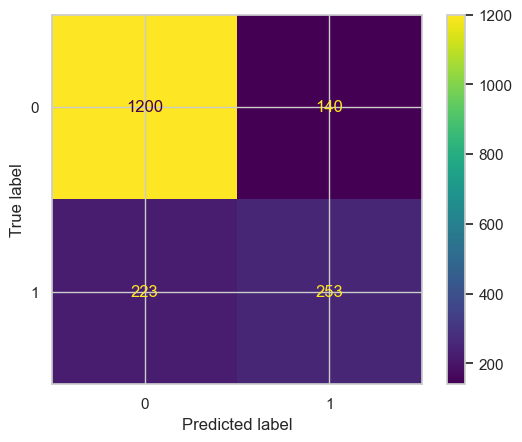

In [70]:
## https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
cnf_matrix = metrics.confusion_matrix(target_test, prediction_data["Most_Likely_Outcome"])
disp = ConfusionMatrixDisplay(cnf_matrix)
disp.plot()
plt.show()